# Entrega 1
- Descripción del sistema computacional:
- Pregunta de estudio: 
- Tipos de datos a recolectar:

# Entrega 2
- Metodología de evaluación de desempeño:
    (Monitoreo, benchmarking o redes de colas)
- Diseño del estudio (y primeros resultados):

# Entrega 3
Informe final con
- Recoleccion de Datos
- Resultados
> con interpretacion
- Conclusiones

$$\text{Lista Nueva lista de Data}$$

<img src="newData/list.png" alt="Girl in a jacket">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def parseReqMemString(s):
    suf = ""
    i = len(s)-1
    while i and not s[i].isnumeric():
        suf += s[i]
        i-=1
    num = int(s[:i+1])
    if "G" in suf:
        num *= 1000
    elif "M" not in suf:
        print(suf) # Error
    return num

def readData(filename, sep=",", parse_dates=[]):
    data = pd.read_csv(filename, sep=sep)
    for col in parse_dates:
        data[col] = pd.to_datetime(data[col], errors="coerce")
    data["ReqMem"] = data["ReqMem"].apply(
        lambda x: 0 if (len(x) == 2) else parseReqMemString(x)
    )
    return data  
    
def hCumsum(data):
    columns = data.columns[1:]
    data[columns] = data[columns].cumsum(axis=1)
    return data, columns

In [38]:
# 1. Read and clean data

# 1.1 WebData
'''
archivos = [
    "CPU Utilization.csv", #0
    "GPU Utilization.csv", #1
    "GPU Used Memory.csv", #2
    "Memory.csv",          #3
    "Patagon - Power.csv", #4
]

data = []
cols_ix = [] 
for i, a in enumerate(archivos):
    d, c = hCumsum(readData(a, parse_dates=["Time"]))
    data.append(d)
    cols_ix.append(c)
'''

# 1.2 PatagonData
monitoreo = readData("../Shared/monitoreo.csv", sep="|", parse_dates=['Start', 'End'])

##### Cantidad de Nulls por data (donde hayan)
Universo: 15412
- "Unnamed: 19": todos jj
- "MinCPU": 924
- "MaxVMSize": 924
- "AveVMSize"
- "MaxRSS": 924
- "AveRSS": 924
- "MaxDiskWrite": 924
- "AveDiskWrite": 924
- "MaxDiskRead": 924
- "AveDiskRead": 924
- "ReqTRES": 10364

In [4]:
# Columnas a filtrar
filtrado = [
    'Unnamed: 19'
]

In [5]:
filtered_monitoreo = monitoreo.copy()
filtered_monitoreo.drop(filtrado, axis=1, inplace=True)
print(filtered_monitoreo.shape)

(15412, 19)


In [6]:
# Columnas Start y End
validTime_data = filtered_monitoreo[filtered_monitoreo["Start"].notnull()]
validTime_data = validTime_data[validTime_data["End"].notnull()]

# Columna elapsed
## The WARNING is ok!
parsed_elapsed = pd.to_timedelta(validTime_data["Elapsed"], unit="h", errors="coerce")
validTime_data["Elapsed"] = parsed_elapsed

# Filtrado de lapsos negativos:
validTime_data = validTime_data[validTime_data["Elapsed"] > pd.Timedelta(0, unit='s')]

validTime_data

,State,Start,End,Elapsed,ReqMem,ReqTRES,AveDiskRead,MaxDiskRead,AveDiskWrite,MaxDiskWrite,AveRSS,MaxRSS,AveVMSize,MaxVMSize,ReqCPUS,CPUTime,CPUTimeRAW,MinCPU,TotalCPU
3,FAILED,2021-05-01 16:30:15,2021-05-01 16:30:16,0 days 00:00:01,100000Mn,"billing=32,cpu=32,mem=100000M,node=1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,00:00:32,32,NaN,00:00.017
4,FAILED,2021-05-01 16:30:15,2021-05-01 16:30:16,0 days 00:00:01,100000Mn,NaN,0,0,0,0,1260K,1260K,207696K,207696K,32,00:00:32,32,00:00:00,00:00.014
5,FAILED,2021-05-01 16:30:15,2021-05-01 16:30:16,0 days 00:00:01,100000Mn,NaN,0,0,0,0,816K,816K,273752K,273752K,32,00:00:32,32,00:00:00,00:00.002
6,FAILED,2021-05-01 16:34:16,2021-05-01 16:34:17,0 days 00:00:01,100000Mn,"billing=32,cpu=32,mem=100000M,node=1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,00:00:32,32,NaN,00:00.016
7,FAILED,2021-05-01 16:34:16,2021-05-01 16:34:17,0 days 00:00:01,100000Mn,NaN,0,0,0,0,1264K,1264K,207696K,207696K,32,00:00:32,32,00:00:00,00:00.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15402,COMPLETED,2021-07-05 03:12:24,2021-07-05 03:12:26,0 days 00:00:02,65556Mn,"billing=1,cpu=1,gres/gpu=5,mem=65556M,node=1",0,0,0,0,860K,860K,273752K,273752K,1,00:01:20,80,00:00:00,00:01.038
15403,COMPLETED,2021-07-05 03:12:28,2021-07-05 03:12:31,0 days 00:00:03,65556Mn,"billing=1,cpu=1,gres/gpu=6,mem=65556M,node=1",0,0,0,0,860K,860K,273752K,273752K,1,00:02:24,144,00:00:00,00:01.265
15407,FAILED,2021-07-05 09:33:11,2021-07-05 09:33:12,0 days 00:00:01,0n,NaN,0,0,0,0,864K,864K,273752K,273752K,8,00:00:08,8,00:00:00,00:00.004
15408,COMPLETED,2021-07-05 09:33:12,2021-07-05 09:33:14,0 days 00:00:02,0n,NaN,0,0,0,0,856K,856K,273752K,273752K,8,00:00:16,16,00:00:00,00:00.821


In [36]:
def parseReqMemString(s):
    suf = ""
    i = len(s)-1
    while i and not s[i].isnumeric():
        suf += s[i]
        i-=1
    num = int(s[:i+1])
    if "G" in suf:
        num *= 1000
    elif "M" not in suf:
        print(suf)
    
    return num

test_col = validTime_data["ReqMem"].apply(
    lambda x: 0 if (len(x) == 2) else parseReqMemString(x)
)
test_data = validTime_data.copy()
test_data["ReqMem"] = test_col
test_data["ReqMem"].unique()


array([100000,      0, 958444,  16000,  65556,  64000,  40000,  10000])

In [94]:
def filter_elapsed_seconds(data, left=0, right=0):
    if left > 0:
        idx_filtrados = data["Elapsed"] >= pd.Timedelta(left, unit='s')
        data = data[idx_filtrados]
    if right > 0:
        idx_filtrados = data["Elapsed"] <= pd.Timedelta(right, unit='s')
        data = data[idx_filtrados]
    return data

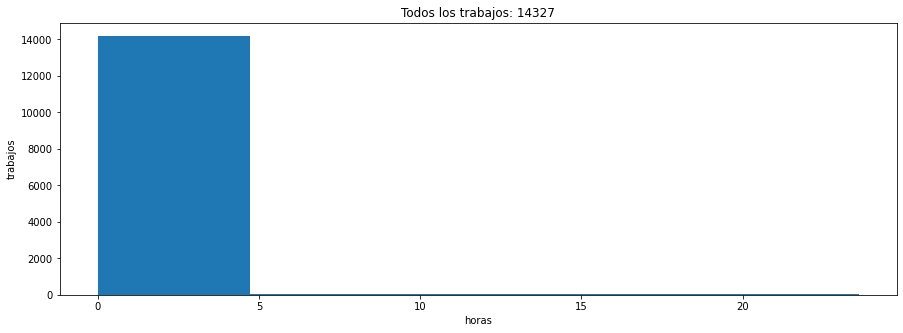

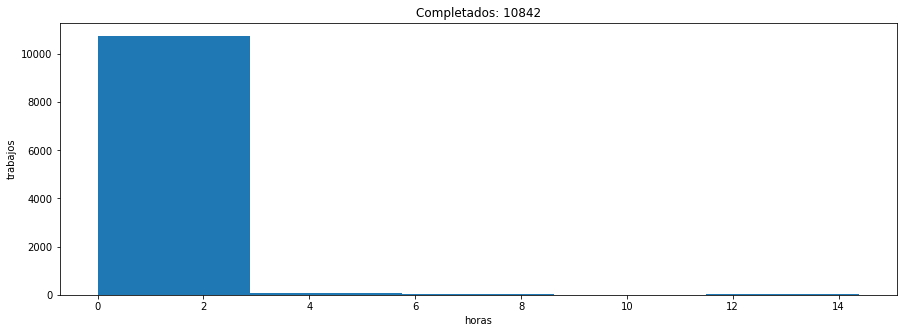

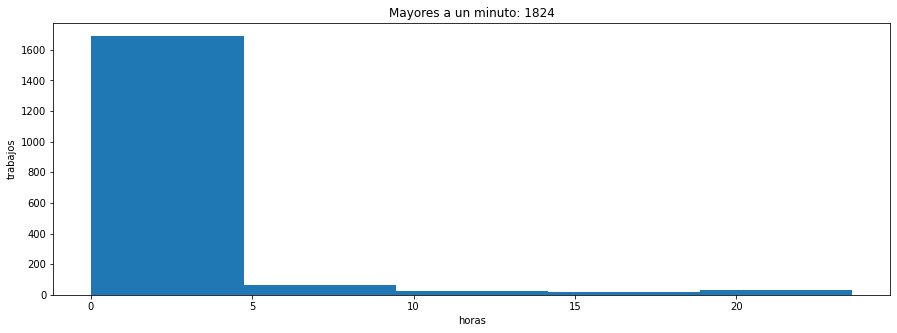

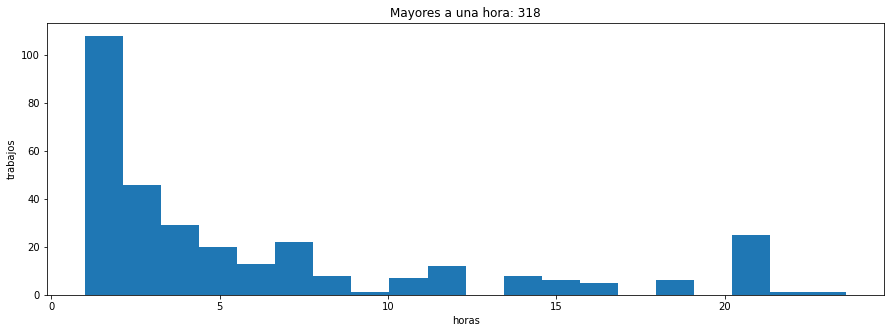

In [101]:
# Histogramas:

# 1. Todos los trabajos

n_bins = 5
plt.figure(figsize=(15, 5))
plt.xlabel("horas")
plt.ylabel("trabajos")

x = validTime_data["Elapsed"].dt.total_seconds() / (60*60) # To hours
plt.hist(x, bins=n_bins)
plt.title("Todos los trabajos: {}".format(len(x)))
plt.show()

# 4. Solo los completados

n_bins = 5
plt.figure(figsize=(15, 5))
plt.xlabel("horas")
plt.ylabel("trabajos")

elapsed_data = validTime_data[validTime_data["State"] == "COMPLETED"]
x = elapsed_data["Elapsed"].dt.total_seconds() / (60*60) # To hours
plt.hist(x, bins=n_bins)
plt.title("Completados: {}".format(len(x)))
plt.show()


# 2. Los que superaron un minuto

n_bins = 5
plt.figure(figsize=(15, 5))
plt.xlabel("horas")
plt.ylabel("trabajos")

elapsed_data = filter_elapsed_seconds(validTime_data, 60)
x = elapsed_data["Elapsed"].dt.total_seconds() / (60*60) # To hours
plt.hist(x, bins=n_bins)
plt.title("Mayores a un minuto: {}".format(len(x)))
plt.show()

# 3. Solo los que superaron una hora

n_bins = 20
plt.figure(figsize=(15, 5))
plt.xlabel("horas")
plt.ylabel("trabajos")

elapsed_data = filter_elapsed_seconds(validTime_data, 60*60)
x = elapsed_data["Elapsed"].dt.total_seconds() / (60*60) # To hours
plt.hist(x, bins=n_bins)
plt.title("Mayores a una hora: {}".format(len(x)))
plt.show()



In [ ]:
for i in range(len(data)):
    plt.figure(figsize=(15, 10))
    plt.plot(data[i]["Time"], data[i][cols_ix[i]])
    plt.savefig("{}.png".format(archivos[i]), bbox_inches='tight')